<a href="https://colab.research.google.com/github/kireeti-ai/Machine-Learning-Notes/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42)

In [4]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.03%


In [7]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



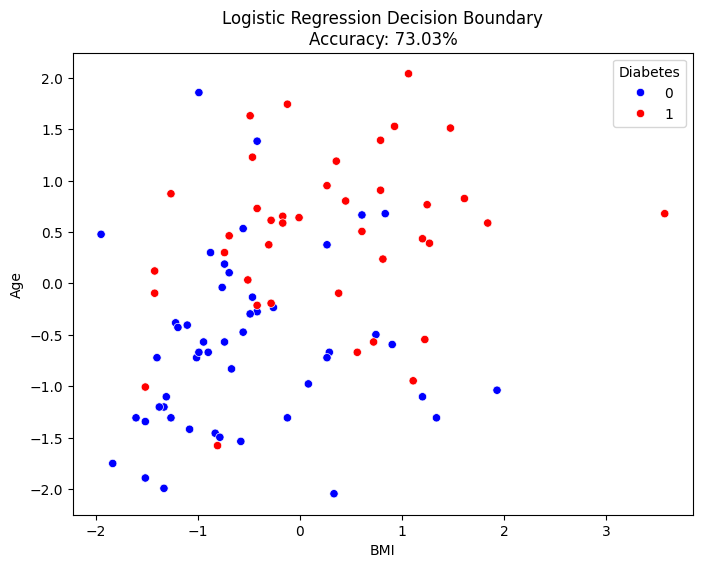

In [8]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
    accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()

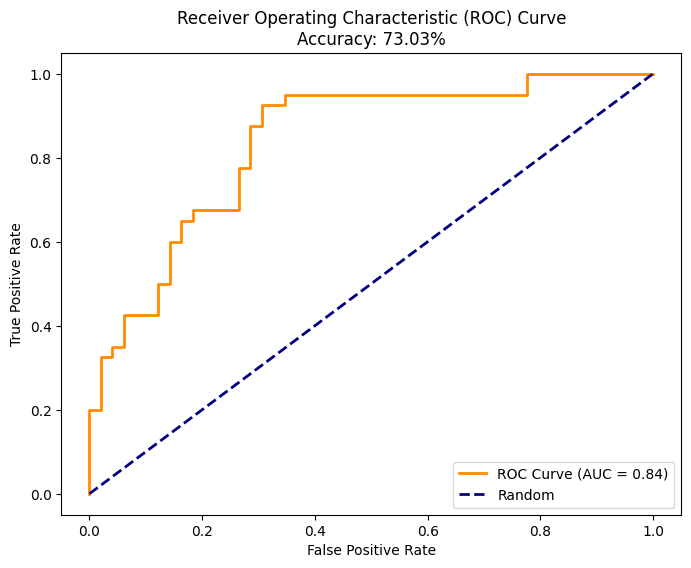

In [9]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

In [32]:

data = pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [30]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Task
Download the employee retention dataset from "HR_comma_sep.csv" and perform the following:
1. Conduct exploratory data analysis to identify variables with a direct and clear impact on employee retention.
2. Create bar charts to visualize the impact of employee salaries on retention.
3. Generate bar charts to show the correlation between department and employee retention.
4. Build a logistic regression model using the variables identified in step 1.
5. Measure the accuracy of the model.

## Explore data

### Subtask:
Explore the data to find variables that most directly impact employee retention.


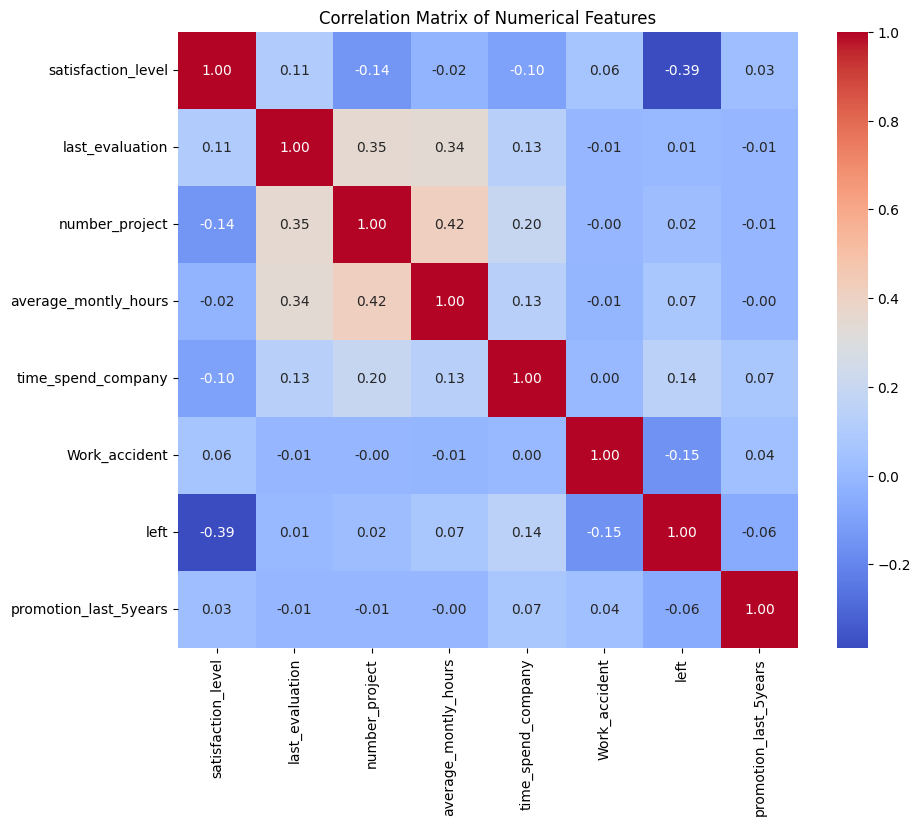


Features with significant correlation to 'left':
satisfaction_level   -0.388375
time_spend_company    0.144822
Work_accident        -0.154622
left                  1.000000
Name: left, dtype: float64


In [23]:
# Calculate the correlation matrix for numerical features
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Identify features with significant correlation to 'left'
significant_features = correlation_matrix['left'][(correlation_matrix['left'] > 0.1) | (correlation_matrix['left'] < -0.1)]

# Print the identified features
print("\nFeatures with significant correlation to 'left':")
print(significant_features)

**Reasoning**:
Group the data by 'salary' and 'left', calculate the mean of 'left', and then unstack the result to prepare for plotting.



In [24]:
salary_retention = data.groupby(['salary', 'left'])['left'].count().unstack()
display(salary_retention)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


**Reasoning**:
Now that the data is grouped and unstacked, I can create a bar chart to visualize the impact of salary on employee retention.



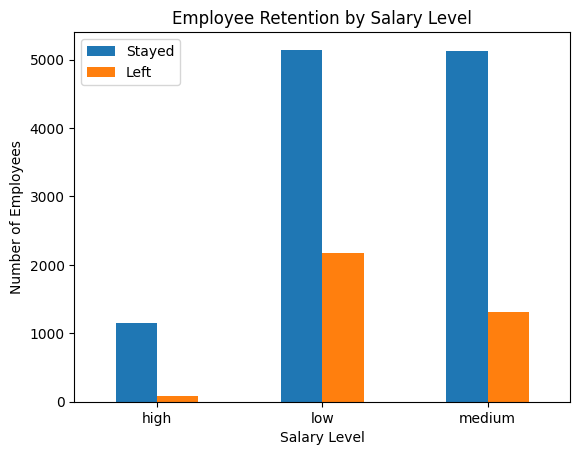

In [25]:
salary_retention.plot(kind='bar', stacked=False)
plt.title('Employee Retention by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Left'])
plt.show()

## Visualize departments

### Subtask:
Generate bar charts to show the correlation between department and employee retention.


**Reasoning**:
Group the data by Department and left, count the occurrences, and then create a bar chart to visualize the relationship between department and employee retention, adding appropriate labels and a title.



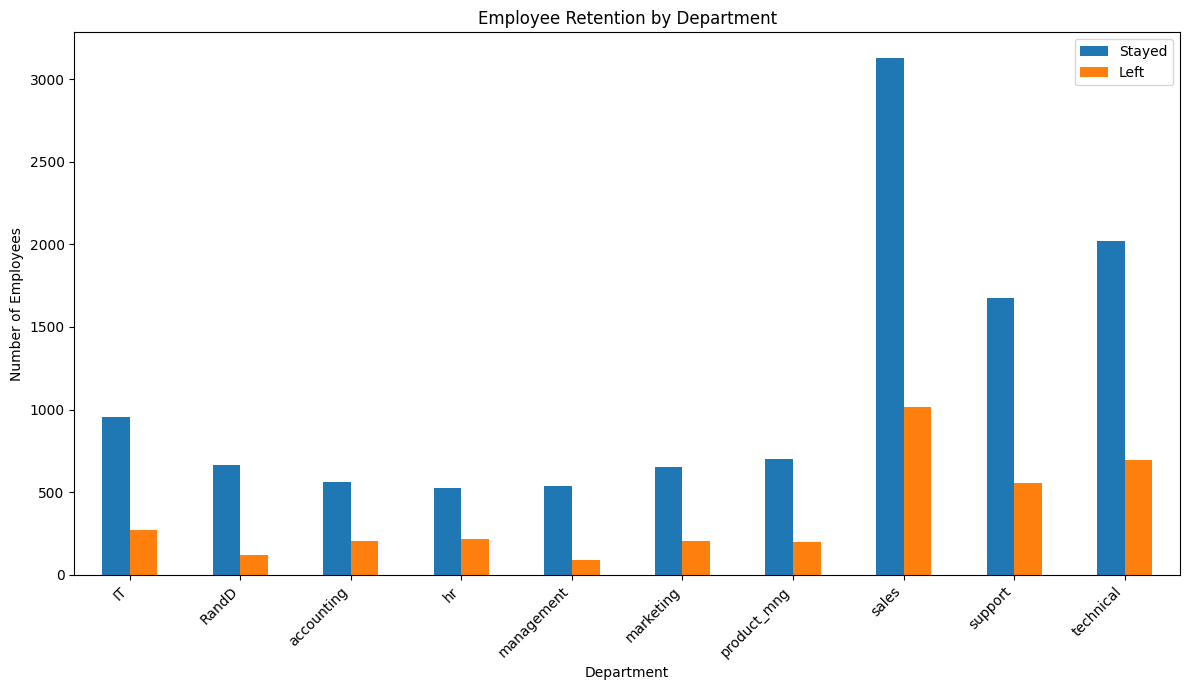

In [26]:
department_retention = data.groupby(['Department', 'left'])['left'].count().unstack()
department_retention.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(['Stayed', 'Left'])
plt.tight_layout()
plt.show()

## Build model

### Subtask:
Build a logistic regression model using the key variables identified in the initial analysis.


In [28]:
# Prepare the data
data_encoded = pd.get_dummies(data, columns=['Department', 'salary'], drop_first=True)
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print the model to confirm it has been trained
print(model)

LogisticRegression(max_iter=1000)


In [31]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model: {:.2f}%".format(accuracy * 100))

Accuracy of the logistic regression model: 78.23%


In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
iris = load_iris()
X=iris.data
y= iris.target
print("Target classes:", iris.target_names)

Target classes: ['setosa' 'versicolor' 'virginica']


In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
# Create model
model = LogisticRegression(max_iter=200)

# Train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



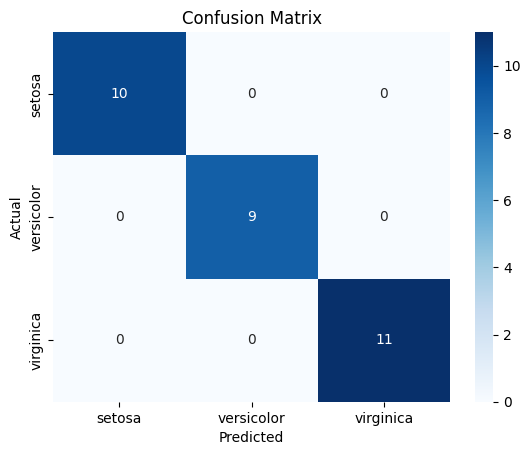

In [43]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Predict on new samples from the test set
sample_indices = [0, 1, 2]  # any 3 test samples
sample_inputs = X_test[sample_indices]
sample_predictions = model.predict(sample_inputs)

# Show predictions
for i, pred in zip(sample_indices, sample_predictions):
    print(f"Sample {i}: Predicted = {iris.target_names[pred]}, Actual = {iris.target_names[y_test[i]]}")

Sample 0: Predicted = versicolor, Actual = versicolor
Sample 1: Predicted = setosa, Actual = setosa
Sample 2: Predicted = virginica, Actual = virginica
